<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- ANN

- 경사하강법

- 오차역전파

- Optimizer

- CNN

- RNN, LSTM, GRU

- ResNet

<혼자공부하는 머신러닝 + 딥러닝, 박해선, 한빛미디어>

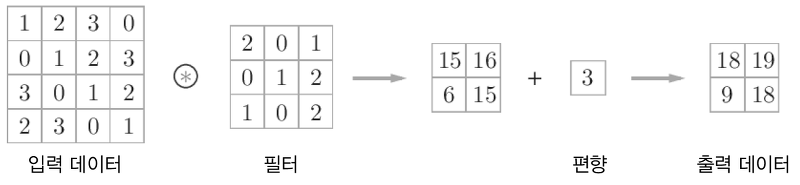

<밑바닥부터 시작하는 딥러닝, 사이토 고키, 한빛미디어>

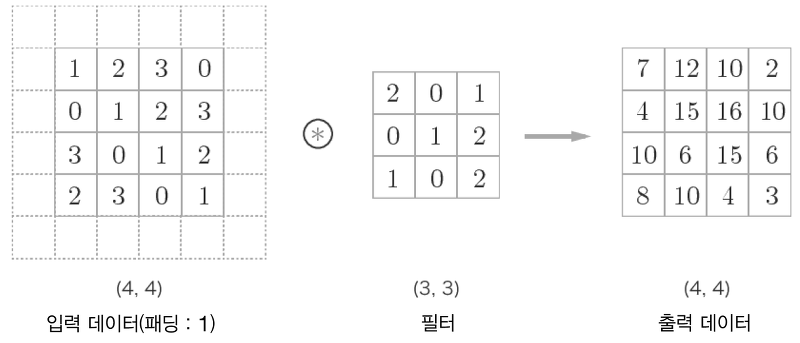

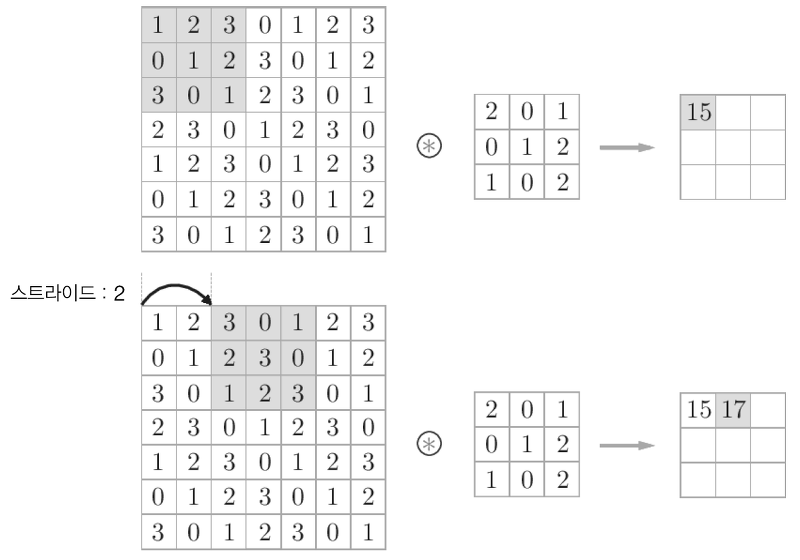

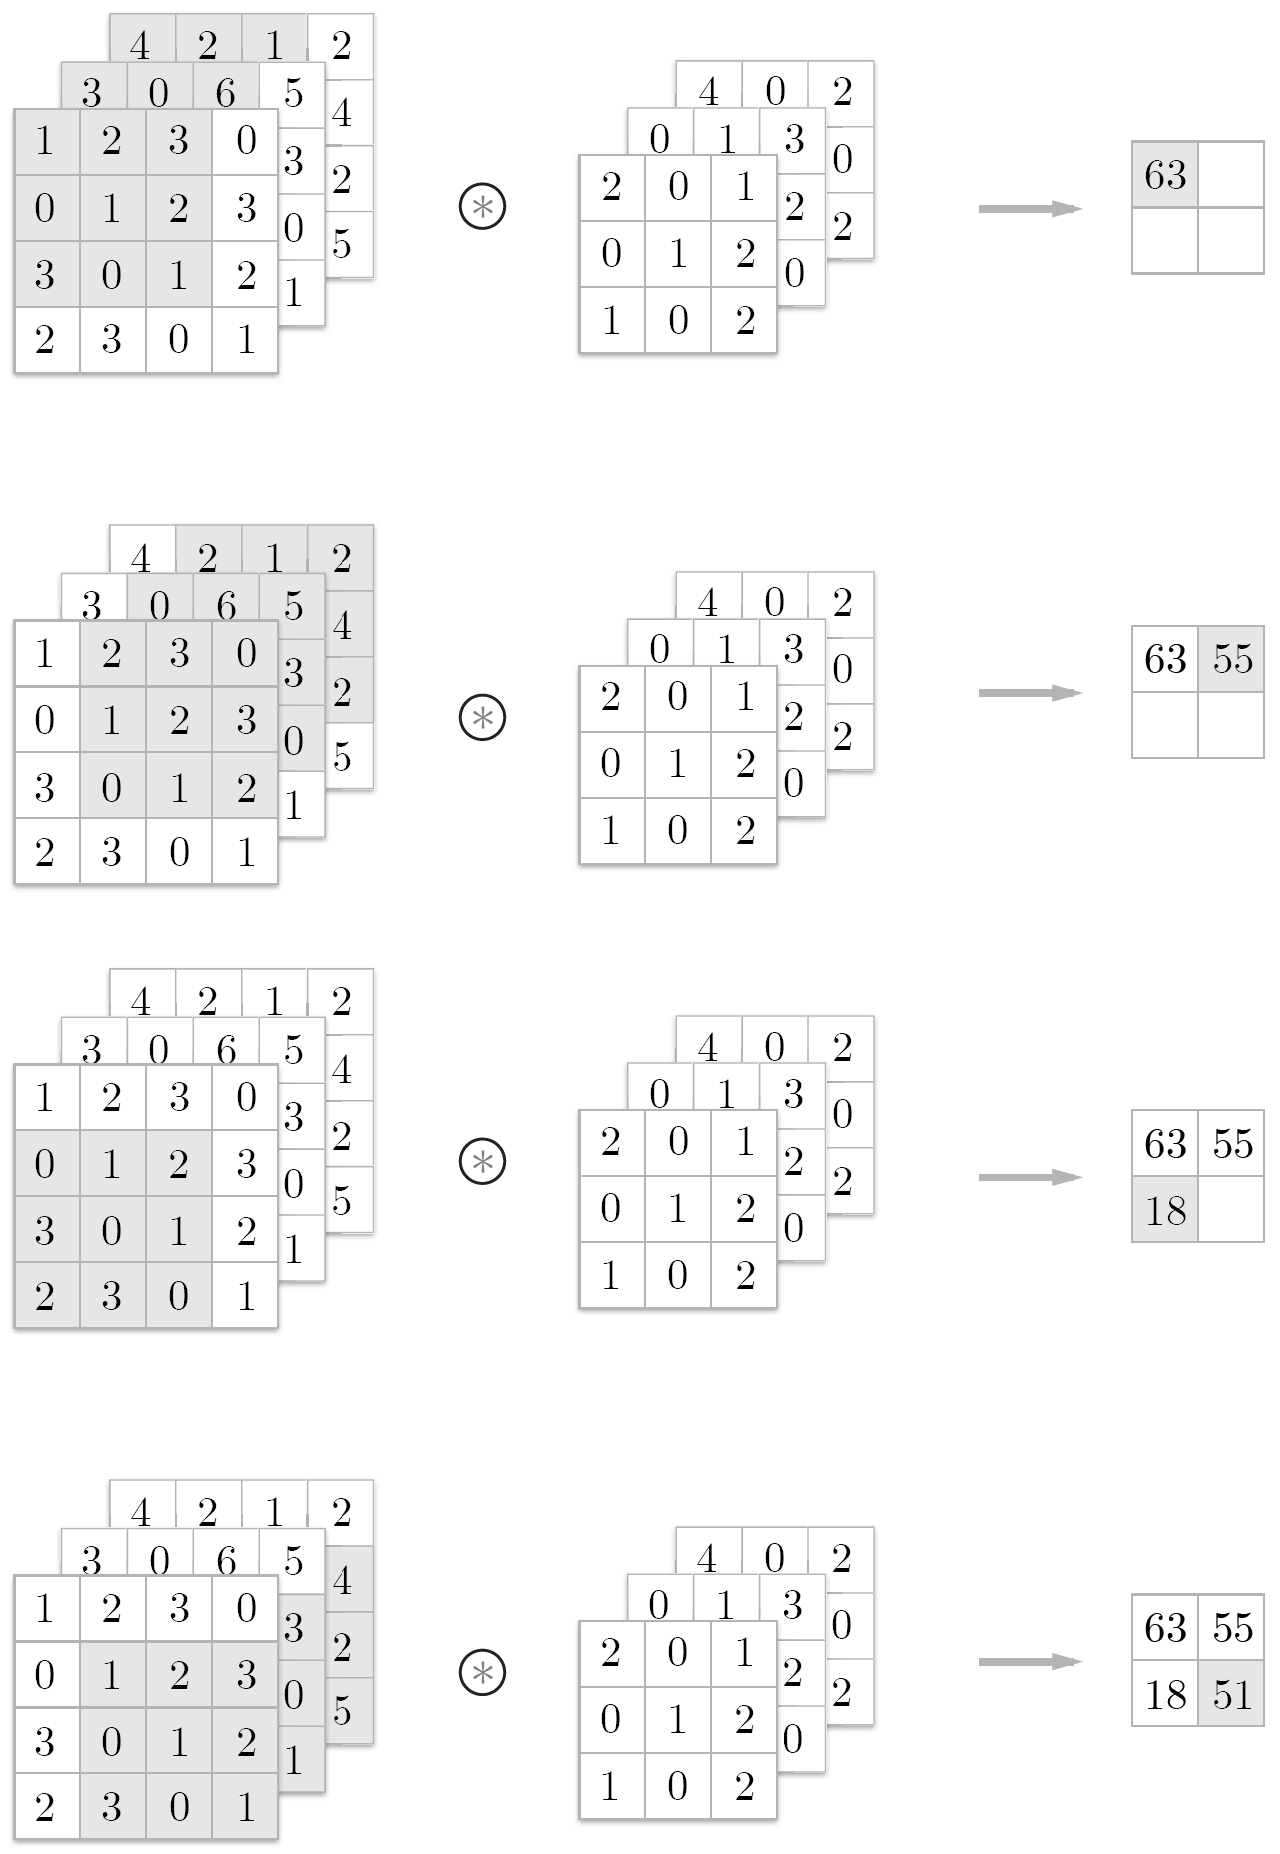

1) ouput 의 채널이 1인 경우

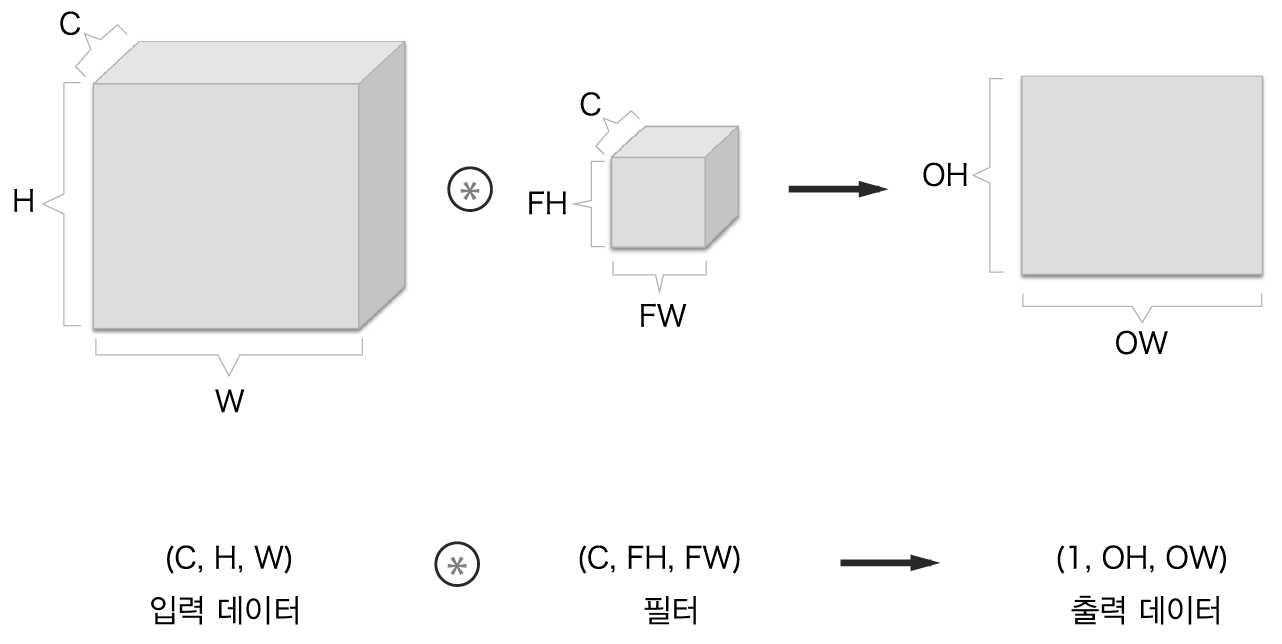

2) OUPUT 채널이 여럿인 경우

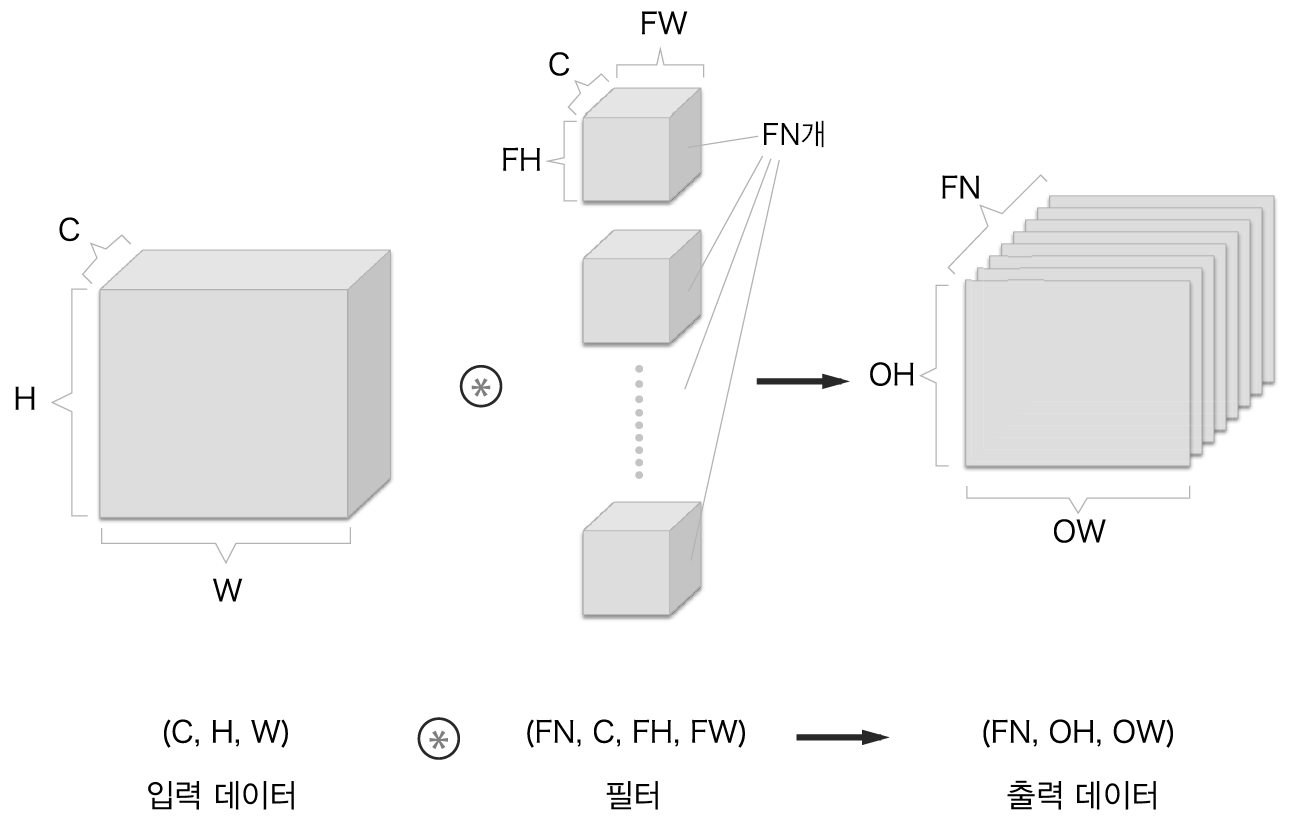

- 합성곱 : hadamard product 후 합계를 내어 산출값을 얻는 과정

- 입력자료의 채널수는 명시적으로 사용한다.

    예> 흑백이미지 -> (28, 28, 1)

    (60000, 28, 28, 1)

- 입력자료의 채널수와 필터의 채널수는 동일해야 한다.

- 특성 맵 : 합성곱을 한 후, 활성화 함수를 통과한 값들을 말함

- 필터의 갯수 대로 특성맵의 채널 수가 결정 된다.

입력 크기를 (H, W), 필터 크기를(FH, FW), 출력 크기를 (OH, OW) 로 했을 경우

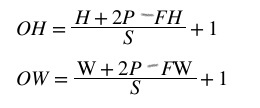

#Max pooling 층

- 가로 세로 크기만을 조절한다. 깊이(C) 있을땐 유지 한다.

- 가로 세로의 크기를 줄여주지만 특성맵의 개수는 줄여주지 않는다.

- 예시> (2, 2, 3) -> (1, 1, 3)

- 최대값만 뽑는 것 처럼 어떤 특징만 얻어 내는 것으로 생각 할 수 있다.

- 풀링층의 출력도 특성맵이라 한다.

- 스트라이드를 크게하여 특성맵을 줄이는 것보다 풀링 층에서 크기를 줄이는 것이 경험적으로 더 나은 성능을 내기 때문(혼공)

- 평균 풀링 층은, AveragePooling2D를 이용한다.

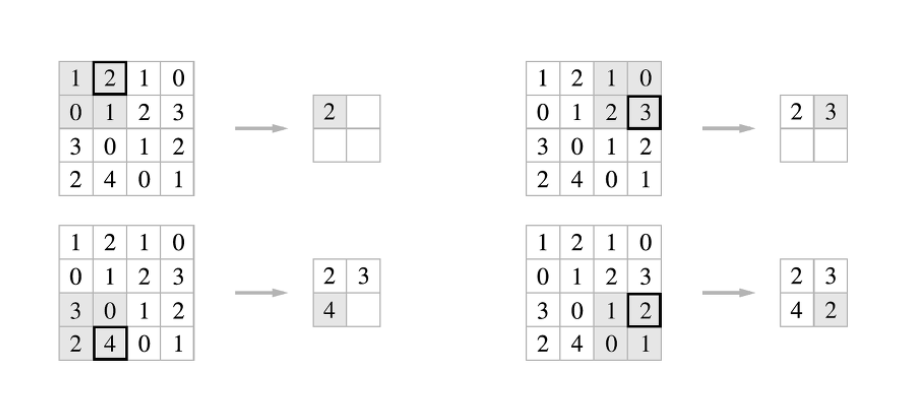

In [ ]:
keras.layers.MaxPooling2D(2, strides=2, padding='valid')

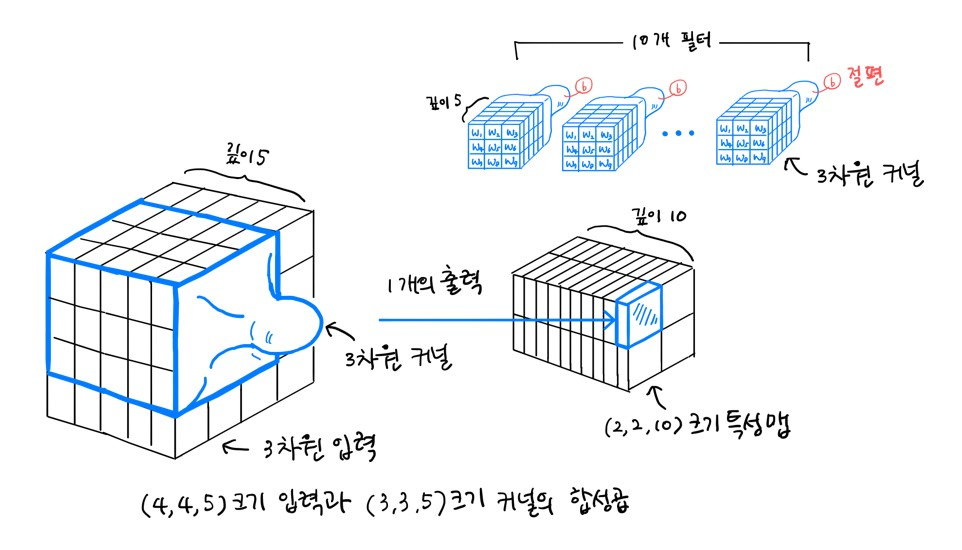

In [ ]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
train_input.shape, test_input.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
train_scaled = train_input.reshape(-1, 28, 28, 1)/255.0

In [ ]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target,
                                                                      test_size=0.2, random_state=42)

In [ ]:
train_scaled.shape, val_scaled.shape, train_target.shape, val_target.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28, 28, 1)))

#(28, 28, 32)

In [ ]:
model.add(keras.layers.MaxPooling2D(2)) #(2, 2) 패딩 사용 -> (14, 14, 32)

In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same')) # (14, 14, 64)
model.add(keras.layers.MaxPooling2D(2)) # (7, 7, 64)

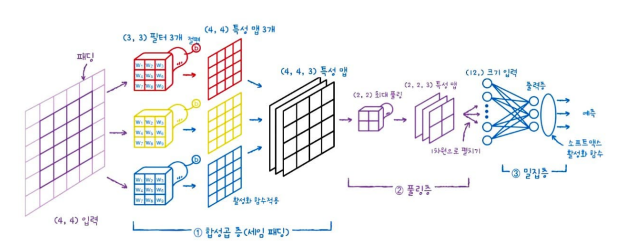

In [ ]:
7*7*64

3136

In [ ]:
model.add(keras.layers.Flatten()) #(3136,)
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [ ]:
3*3*32*64+64

18496

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

cp_cb=keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_bset_only=True)
es_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
                    callbacks = [cp_cb, es_cb])

Epoch 1/20
1500/1500 [==============================] - 19s 5ms/step - loss: 0.5091 - accuracy: 0.8178 - val_loss: 0.3178 - val_accuracy: 0.8823
Epoch 2/20
  24/1500 [..............................] - ETA: 6s - loss: 0.3549 - accuracy: 0.8724

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 8s 5ms/step - loss: 0.3382 - accuracy: 0.8775 - val_loss: 0.2747 - val_accuracy: 0.8964
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2927 - accuracy: 0.8945 - val_loss: 0.2451 - val_accuracy: 0.9101
Epoch 4/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2583 - accuracy: 0.9064 - val_loss: 0.2343 - val_accuracy: 0.9131
Epoch 5/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2358 - accuracy: 0.9134 - val_loss: 0.2234 - val_accuracy: 0.9160
Epoch 6/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2151 - accuracy: 0.9211 - val_loss: 0.2149 - val_accuracy: 0.9220
Epoch 7/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1982 - accuracy: 0.9268 - val_loss: 0.2145 - val_accuracy: 0.9202
Epoch 8/20
1500/1500 [==============================] - 13s 8ms/step - loss: 0.1810 - accuracy: 0.9336 - val_loss: 0.2196 - val_accuracy: 0.922

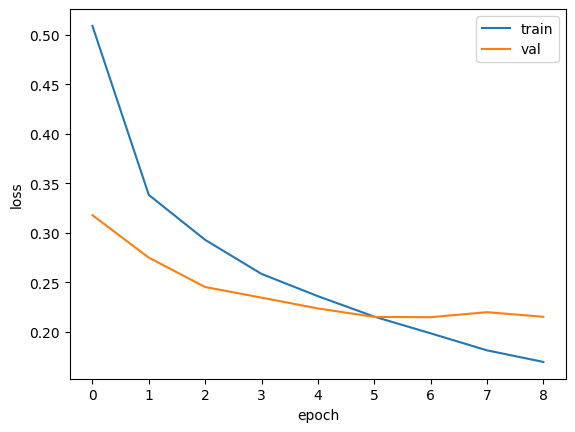

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2145 - accuracy: 0.9202


[0.21453545987606049, 0.9201666712760925]

In [ ]:
val_scaled.shape

(12000, 28, 28, 1)

In [ ]:
val_scaled[0].shape

(28, 28, 1)

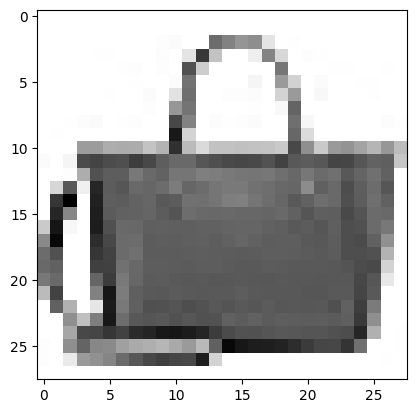

In [ ]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')

In [ ]:
preds = model.predict(val_scaled[:1])

1/1 [==============================] - 0s 243ms/step


In [ ]:
preds

array([[3.3830289e-14, 1.6479672e-22, 2.1887265e-18, 1.7189894e-15,
        6.0608955e-14, 2.9962747e-12, 7.4386124e-13, 8.6856405e-14,
        1.0000000e+00, 1.9710426e-14]], dtype=float32)

<BarContainer object of 10 artists>

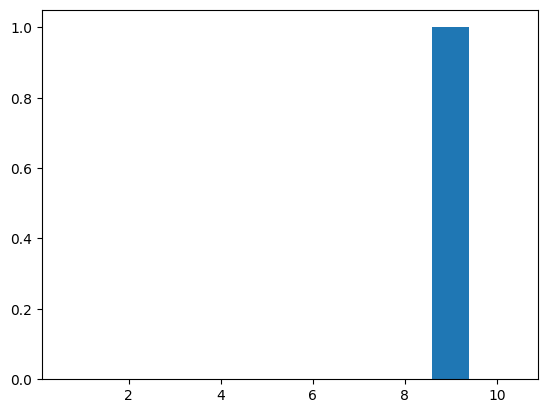

In [ ]:
plt.bar(range(1,11), preds[0])

In [ ]:
test_input.shape

(10000, 28, 28)

In [ ]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
test_target.shape

(10000,)

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 4ms/step - loss: 0.2394 - accuracy: 0.9141


[0.23940542340278625, 0.9140999913215637]

#특성맵, 가중치

In [ ]:
model.layers

필터 (3, 3, 1) 32개, 절편도 32개 -> layers.weights

In [ ]:
model.layers[0].weights

In [ ]:
conv = model.layers[0]

In [ ]:
conv.weights[0].shape # 필터 가중치

TensorShape([3, 3, 1, 32])

In [ ]:
conv.weights[1].shape # 필터 절편

TensorShape([32])

In [ ]:
conv_weights = conv.weights[0].numpy()

In [ ]:
conv_weights.shape

(3, 3, 1, 32)

In [ ]:
conv_weights.mean(), conv_weights.std()

(-0.022427086, 0.24604282)

(array([  1.,   1.,   3.,   1.,   1.,   9.,  47.,  65., 107.,  53.]),
 array([-1.44151998e+00, -1.26136911e+00, -1.08121812e+00, -9.01067257e-01,
        -7.20916390e-01, -5.40765464e-01, -3.60614568e-01, -1.80463687e-01,
        -3.12781340e-04,  1.79838121e-01,  3.59989017e-01]),
 <BarContainer object of 10 artists>)

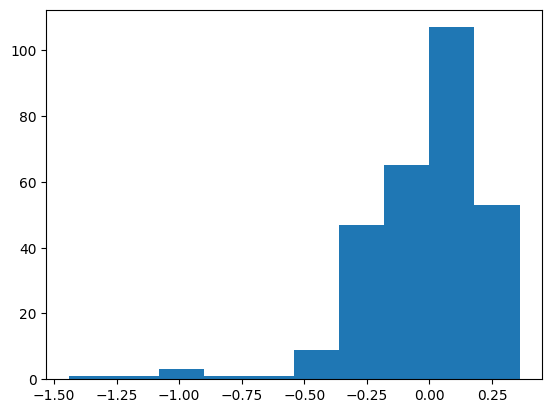

In [ ]:
plt.hist(conv_weights.reshape(-1,1))

In [ ]:
conv_weights.shape

(3, 3, 1, 32)

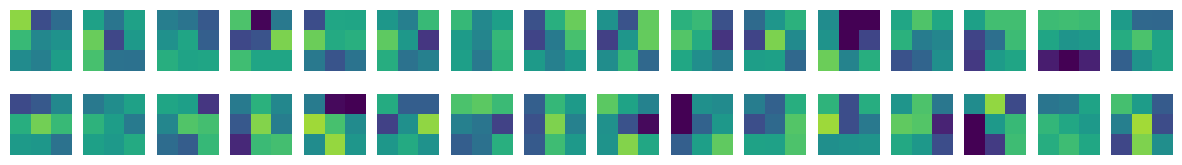

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :,0, i*16 + j ], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [ ]:
no_train_model = keras.Sequential()
no_train_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                       padding='same', input_shape=(28,28,1)))

In [ ]:
no_train_conv = no_train_model.layers[0]

In [ ]:
no_train_conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [ ]:
no_conv = no_train_model.layers[0].weights[0].numpy()

In [ ]:
no_conv.shape

(3, 3, 1, 32)

In [ ]:
no_conv.mean(), no_conv.std()

(-0.010310263, 0.0773888)

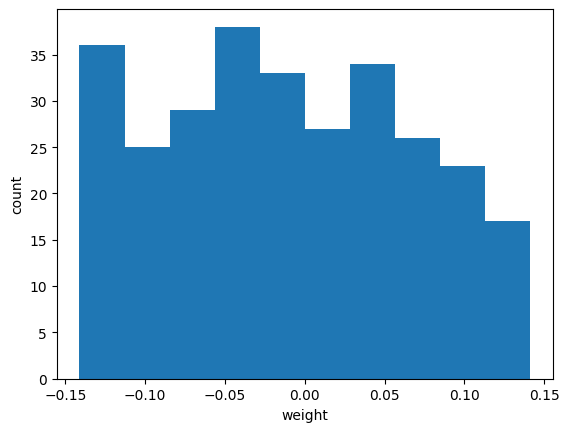

In [ ]:
plt.hist(no_conv.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

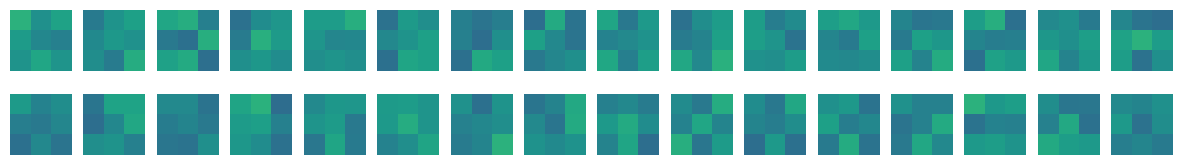

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_conv[:, :,0, i*16 + j ], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

함수형 모델작성

# 함수형 API 만드는 법

model.add(keras.layers.Dense(100, activation='sigmoid'))

        dense1 = keras.layers.Dense(100, activation='sigmoid')
        dense2 = keras.layers.Dense(10, activation='softmax')

        hidden = dense1(inputs)
        outputs = dense2(hidden)

        model = keras.Model(inputs, outputs)  # inputs 와 outputs 연결

    inputs = kreas.Input(shape=(784,))

Conv2D 를 통과하고 난 후의 특성맵을 알고 싶다.

-> 첫번째 Conv2D 를 통과한 출력값을 얻어 내야 한다.

-> 모델 중간에서 출력값을 뽑아 낸다.

-> 함수형 API 를 사용

-> inputs 객체가 자동으로 설정 되어 있지 않다.

-> Sequential 에서는 Input 객체를 자동생성한다.

-> 그리고 그 객체는 Sequential의 model.input 이라는 속성에 저장 되어 있다.



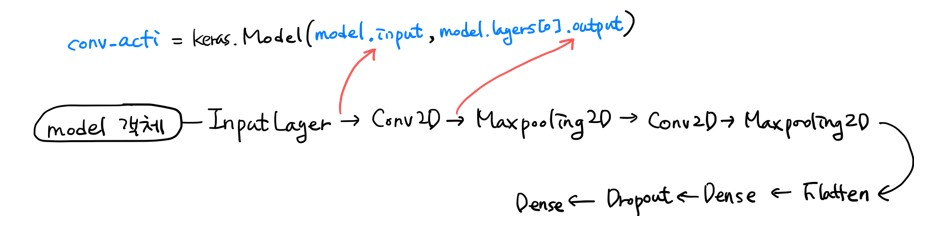

In [ ]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [ ]:
model.layers[0].output

<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d')>

In [ ]:
conv_acti = keras.Model(model.input, model.layers[0].output)

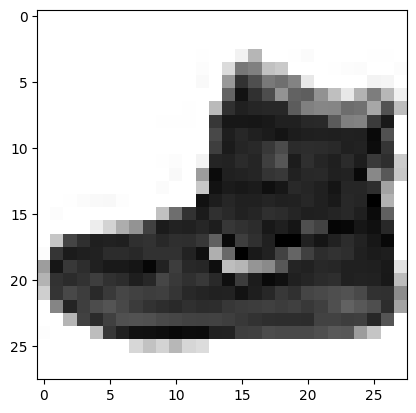

In [ ]:
plt.imshow(train_input[0], cmap='gray_r')

In [ ]:
inputs = train_input[:1].reshape(-1, 28, 28, 1)/250.0

In [ ]:
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 77ms/step


In [ ]:
feature_maps.shape

(1, 28, 28, 32)

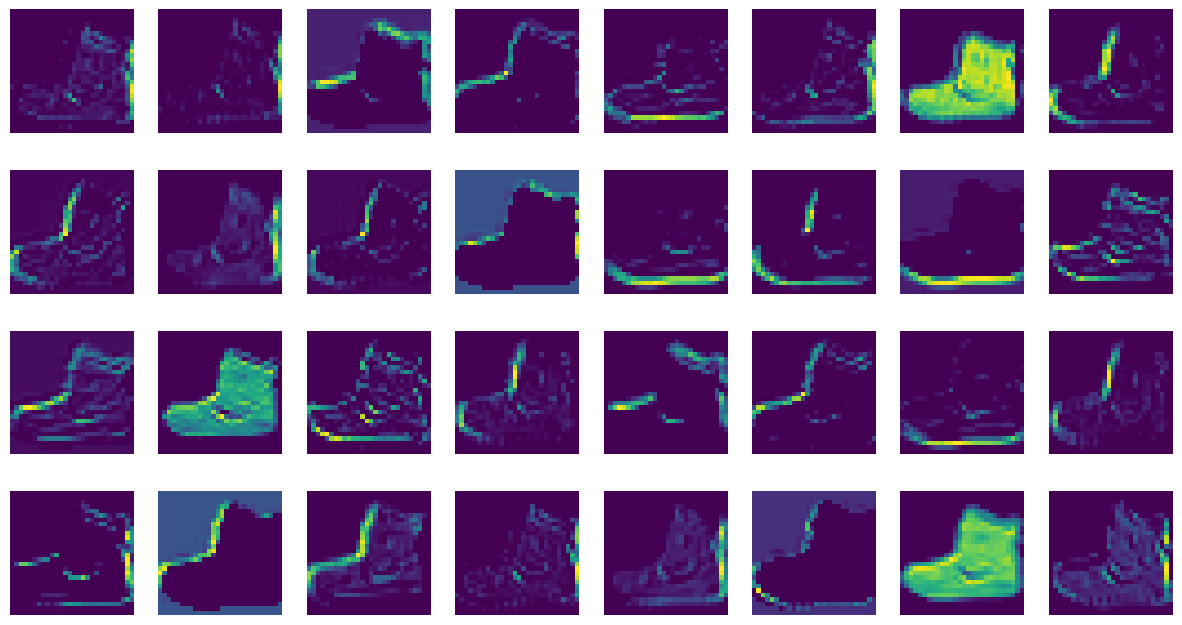

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j ])
    axs[i, j].axis('off')
plt.show()

In [ ]:
model.layers

In [ ]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [ ]:
feature_maps = conv2_acti.predict(train_input[:1].reshape(-1, 28, 28, 1)/255.0)

1/1 [==============================] - 0s 64ms/step


In [ ]:
feature_maps.shape

(1, 14, 14, 64)

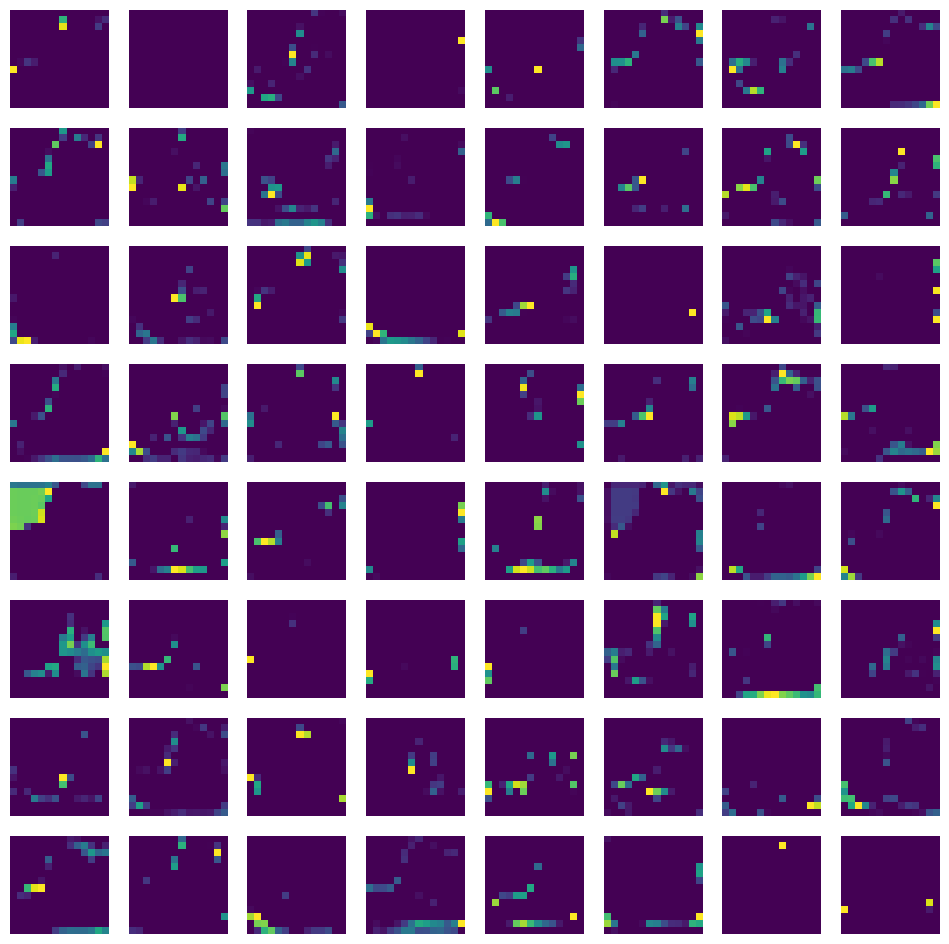

In [ ]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j ])
    axs[i, j].axis('off')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
ls ./drive/MyDrive/*.csv

./drive/MyDrive/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv  ./drive/MyDrive/BTC_USD_CoinDesk.csv


In [ ]:
coindesk_data = pd.read_csv('./drive/MyDrive/BTC_USD_CoinDesk.csv', header=0)

In [ ]:
coindesk_data.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2019-02-28,3772.936335,3796.637284,3824.165879,3666.524016
1,BTC,2019-03-01,3799.678543,3773.441461,3879.231185,3753.800022
2,BTC,2019-03-02,3811.611979,3799.367026,3840.044823,3788.918498
3,BTC,2019-03-03,3804.419170,3806.691513,3819.194356,3759.409216
4,BTC,2019-03-04,3782.664101,3807.845756,3818.695481,3766.242048


In [ ]:
seq = coindesk_data[['Closing Price (USD)']].to_numpy()

In [ ]:
seq[:10]

array([[3772.93633533],
       [3799.67854295],
       [3811.61197937],
       [3804.41917011],
       [3782.66410112],
       [3689.86289319],
       [3832.08088473],
       [3848.95636968],
       [3859.83998333],
       [3828.37190407]])

In [ ]:
seq.shape

(365, 1)

In [ ]:
len(seq)

365

7일치 종가 데이터 사용 =  x_train

 8일째 종가 정답값 = y_train

 w = 7

 h = 1


x_train.shape =  (358, 7, 1)

y_train.shape = (358, 1)

seq2dataset(seq, w, h)

Return X, Y

In [ ]:
seq = coindesk_data[['Closing Price (USD)']].to_numpy()

In [ ]:
seq.shape

(365, 1)

In [ ]:
seq[:10]

array([[3772.93633533],
       [3799.67854295],
       [3811.61197937],
       [3804.41917011],
       [3782.66410112],
       [3689.86289319],
       [3832.08088473],
       [3848.95636968],
       [3859.83998333],
       [3828.37190407]])

[[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]
 [3689.86289319]
 [3832.08088473]]


 [3848.95636968]



[[9631.48494596]
 [9670.85865437]
 [9689.08674285]
 [9919.55144784]
 [9640.46950506]
 [9392.86962872]
 [8787.97836316]]

 [8784.99535244]

In [ ]:
len(seq)

365

X.shape=(358,7,1)

Y.shape=(358,1)

w=7

h=1

      1, 2, 3, 4, 5, 6, 7, 8, ... 356, 357, 358, 359, 360, 361, 362, 363, 364, 365

      0, 1, 2, 3, 4, 5, 6, 7, ... 355, 356, 357, 358, 359, 360, 361, 362, 363, 364

In [ ]:
w=7
h=1
t = len(seq)

In [ ]:
def seq2dataset(seq, w, h):
  X=[]
  Y=[]
  for i in range(len(seq)-(w+h)+1):
    sample_idx.append(i)
    x_idx.append(range(i, i+w))
    y_idx.append(i+(w+h)-1)

In [ ]:
def seq2dataset(seq, w, h):
  X=[]
  Y=[]
  for i in range(len(seq)-(w+h)+1):
    x = seq[i:i+w]
    y = seq[i+(w+h)-1]
    X.append(x)
    Y.append(y)
  return np.array(X), np.array(Y)

In [ ]:
X, Y = seq2dataset(seq, w, h)

In [ ]:
X.shape, Y.shape

((358, 7, 1), (358, 1))

In [ ]:
sample_idx[-4:]

[354, 355, 356, 357]

In [ ]:
x_idx[:4]

[range(0, 7), range(1, 8), range(2, 9), range(3, 10)]

In [ ]:
x_idx[-4:]

[range(354, 361), range(355, 362), range(356, 363), range(357, 364)]

In [ ]:
y_idx[:4]

[7, 8, 9, 10]

In [ ]:
y_idx[-4:]

[361, 362, 363, 364]